<a href="https://colab.research.google.com/github/Venkatakousik/FML/blob/main/multi_regression_on_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
iris = pd.read_csv('/content/drive/MyDrive/Datasets/Iris.csv')

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<ipython-input-18-372bb0b50fbc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=iris.corr(),annot=True)


<Axes: >

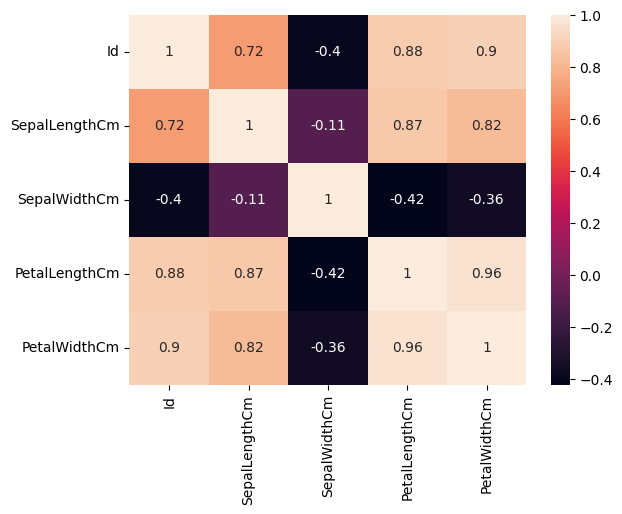

In [18]:
sns.heatmap(data=iris.corr(),annot=True)

<Axes: >

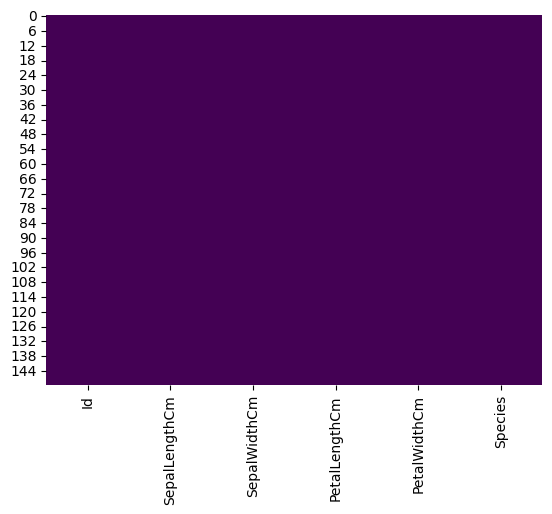

In [21]:
sns.heatmap(iris.isnull(),cbar=None,cmap='viridis')

In [32]:
X = iris.drop(['Id','Species'],axis =1).values


In [33]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}
y = iris.Species.replace(mapping).values

In [ ]:
print(y)

In [39]:
y.shape
y = y.reshape(-1,1)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [42]:
reg.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MSE = mean_squared_error(y_train,y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_train,y_pred)
R2_score = r2_score(y_train,y_pred)

In [45]:
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("MAE = ",MAE)
print("R2_Score = ",R2_score)


MSE =  0.049039984241604155
RMSE =  0.22144973299059123
MAE =  0.17136594946139957
R2_Score =  0.9255010261547526


In [47]:
y_test_pred = reg.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MSE = mean_squared_error(y_test,y_test_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_test_pred)
R2_score = r2_score(y_test,y_test_pred)

In [48]:
print("MSE = ",MSE)
print("RMSE = ",RMSE)
print("MAE = ",MAE)
print("R2_Score = ",R2_score)

MSE =  0.03723364456197499
RMSE =  0.19296021497183038
MAE =  0.1466990776263418
R2_Score =  0.946724514935171
